## Ex1 Use data from Danmarks Statistik - Databanken
1. Go to https://www.dst.dk/da/Statistik/brug-statistikken/muligheder-i-statistikbanken/api#testkonsol
2. Open 'Konsol' and click 'Start Konsol'
3. In the console at pt 1: choose 'Retrieve tables', pt 2: choose get request and json format and pt 3: execute:
  1. check the result
  2. in the code below this same get request is used to get information about all available data tables in 'databanken'. 
4. Change pt. 1 in the console to 'Retrieve data', pt 2: 'get request' and Table id: 'FOLK1A', format: csv, delimiter: semicolon and click: 'Variable and value codes' and choose some sub categories (Hint: hover over the codes to see their meaning). Finally execute and see what data you get.
5. With data aggregation and data visualization answer the following questions:
  1. What is the change in pct of divorced danes from 2008 to 2020?
  2. Which of the 5 biggest cities has the highest percentage of 'Never Married' in 2020?
  3. Show a bar chart of changes in marrital status in Copenhagen from 2008 till now
  4. Show 2 plots in same figure: 'Married' and 'Never Married' for all ages in DK in 2020 (Hint: x axis is age from 0-125, y axis is how many people in the 2 categories). Add lengend to show names on graphs

In [1]:
%pylab inline
%matplotlib inline
import requests

#Get response from API
url = "https://api.statbank.dk/v1/data/FOLK1A/CSV?lang=en&delimiter=Semicolon&OMR%C3%85DE=*&CIVILSTAND=U&Tid=2020K4"
response = requests.get(url)

#Get file name
fname = response.headers["Content-Disposition"].split("=")[1]
fname = "../data/"+fname

#Write the contents to file
if response.ok:
    with open(fname, "wb") as f:
        f.write(response.content)

print("--------------------------")
print("Downloaded {}".format(fname))

Populating the interactive namespace from numpy and matplotlib
--------------------------
Downloaded ../data/FOLK1A.csv


In [2]:
import pandas as pd

divorced_data = pd.read_csv("../data/divorced.csv")
columns_names = divorced_data.columns
print('column names:\n',list(columns_names),'\n\n')
print("divorced_data are of data type: ", type(divorced_data))
divorced_data.head()

column names:
 ['OMRÅDE;KØN;ALDER;TID;CIVILSTAND;INDHOLD'] 


divorced_data are of data type:  <class 'pandas.core.frame.DataFrame'>


,OMRÅDE;KØN;ALDER;TID;CIVILSTAND;INDHOLD
0,All Denmark;Total;Total;2008Q1;Divorced;428864
1,All Denmark;Total;Total;2008Q2;Divorced;431550
2,All Denmark;Total;Total;2008Q3;Divorced;432713
3,All Denmark;Total;Total;2008Q4;Divorced;432156
4,All Denmark;Total;Total;2009Q1;Divorced;434233


129.4354387404865

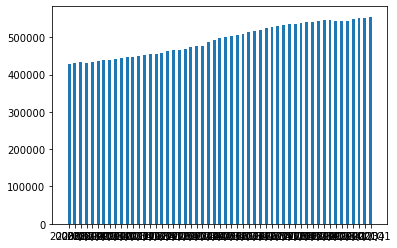

In [3]:
import matplotlib.pyplot as plt

year_data = divorced_data['OMRÅDE;KØN;ALDER;TID;CIVILSTAND;INDHOLD']

amount_divorced = []
years = []

for x in range(len(year_data)):
    first_year = int(year_data[x].split(";")[5])
    #next_year = int(year_data[(x+1)].split(";")[5])
    #result = (((next_year/first_year) * 100) - 100)
    amount_divorced.append(first_year)

for x in range(len(year_data)):
    result = year_data[x].split(";")[3]
    years.append(result)

procentage = (int(year_data[52].split(";")[5])/int(year_data[0].split(";")[5])*100)

plt.bar(years, amount_divorced,width=0.5, align='center')
procentage

Copehangen, Odense, Aarhus, Aalborg


<BarContainer object of 99 artists>

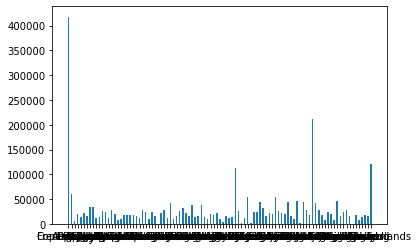

In [4]:
data = pd.read_csv("../data/never_married")

never_married = data['OMRÅDE;CIVILSTAND;TID;INDHOLD']

amount_never_married = []
cities = []

for x in range(len(never_married)):
    result = int(never_married[x].split(";")[3])
    amount_never_married.append(result)
    
for x in range(len(never_married)):
    result = never_married[x].split(";")[0]
    cities.append(result)
    
    
cities.remove("All Denmark")
cities.remove("Region Hovedstaden")
cities.remove("Region Sjælland")
cities.remove("Region Syddanmark")
cities.remove("Region Midtjylland")
cities.remove("Region Nordjylland")
amount_never_married.remove(2859116)
amount_never_married.remove(981652)
amount_never_married.remove(369548)
amount_never_married.remove(568943)
amount_never_married.remove(657563)
amount_never_married.remove(281410)

print("Copehangen, Odense, Aarhus, Aalborg")
plt.bar(cities, amount_never_married,width=0.5, align='center')

<BarContainer object of 53 artists>

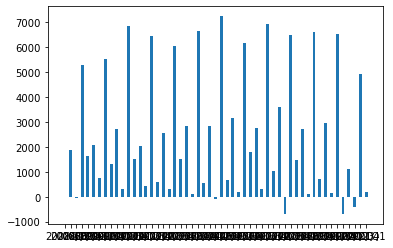

In [5]:
url1 = "https://api.statbank.dk/v1/data/FOLK1A/CSV?lang=en&OMR%C3%85DE=101&CIVILSTAND=TOT&Tid=*"
dst1 = pd.read_csv(url1, sep=";")

marrital_status = []
year = []

for x in range(len(dst1)):
    if x == 0:
        marrital_status.append(0)
    
    if x > 0:
        result1 = ((dst1.iloc[x]['INDHOLD']) - (dst1.iloc[x-1]['INDHOLD']))
        marrital_status.append(result1)

    
for x in range(len(dst1)):
    result = dst1.iloc[x]['TID']
    year.append(result)
    
plt.bar(year, marrital_status,width=0.5, align='center')

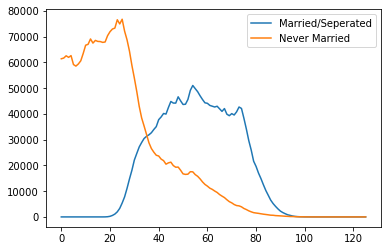

In [26]:
url2 = "https://api.statbank.dk/v1/data/FOLK1A/CSV?lang=en&OMR%C3%85DE=&CIVILSTAND=G%2CU&Tid=2020K4&ALDER=*"
dst2 = pd.read_csv(url2, sep=";")

married_list = []
never_list = []
ages = []

for x in range(127):
    married_list.append(dst2.iloc[x]['INDHOLD'])
    
for x in range(127, 254):
    never_list.append(dst2.iloc[x]['INDHOLD'])
    
for x in range(126):
    ages.append(x)
    

married_list.remove(2138124)
never_list.remove(2859116)

plt.plot(ages, married_list, label="Married/Seperated")
plt.plot(ages, never_list, label="Never Married")
plt.legend()

## Ex2 Use another table (extra)
Choose any of the other tables in 'databanken' to find interesting data.
1. Collect the data
2. Pose 5 or more interesing questions to the data
3. Answer the questions by aggregating the data
4. Illustrate the answers with visual plots